In [17]:
from openai import OpenAI
import re

ROLE = """
When requested to write code, pick Python.
When requested to show chess position, always use the FEN notation,
show it always as a markdown code block with the prefix "FEN:" in uppercase.
When requested to show HTML always include what is in the body tag, 
but exclude the boilerplate code surrounding the body tag.
"""

MODEL = "gpt-3.5-turbo"
AI = None

def req(msg):
    return [{"role": "system", "content": ROLE}, 
            {"role": "user", "content": msg}]

def ask(input):
    comp = AI.chat.completions.create(model=MODEL, messages=req(input))
    if len(comp.choices) > 0:
        return comp.choices[0].message.content
    return "ERROR"


def main(args):
    global AI
    AI = OpenAI(api_key=args.get("OPENAI_API_KEY"))

    input = args.get("input", "")
    output = ask(input)

    return {"body": output }

In [18]:
# read secrets
from pathlib import Path
lines = Path("../../.env").read_text().splitlines()
args = { x.split("=")[0]:x.split("=")[-1] for x in lines }
#args
from openai import OpenAI
AI = OpenAI(api_key=args.get("OPENAI_API_KEY"))

In [19]:
print(ask("2+2"))

```python
result = 2 + 2
print(result)  # Output: 4
```
The result of `2 + 2` is 4.


In [13]:
input = "2+2" 
comp = AI.chat.completions.create(model=MODEL, messages=req(input))


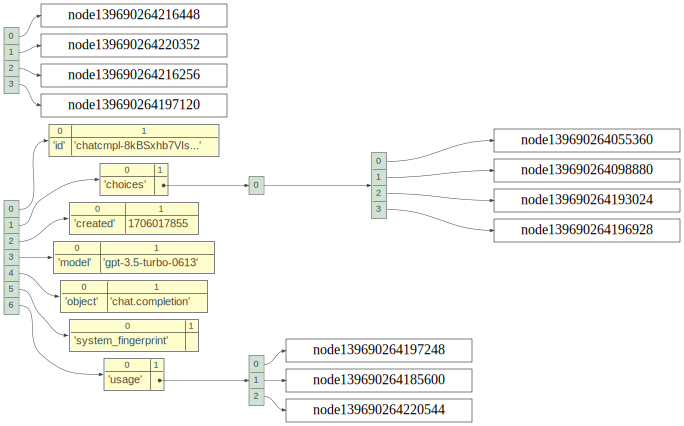

In [16]:
# https://github.com/parrt/lolviz
from lolviz import *
objviz(comp)
